In [0]:
# import tensorflow as tf
# import keras 
#  keras.__version__

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

keras.__version__

'2.2.4-tf'

In [0]:
import os, shutil

In [0]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'art_classify'

# The directory where we will
# store our smaller dataset
base_dir = 'art_classify'

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_dir ='/content/gdrive/My Drive/art_classify/art_classify/train'

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 325 images belonging to 2 classes.


In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30 )




Epoch 1/30





100/100 [==============================] - 113s 1s/step - loss: 0.2863 - acc: 0.8855
Epoch 2/30
100/100 [==============================] - 16s 160ms/step - loss: 0.1290 - acc: 0.9555
Epoch 3/30
100/100 [==============================] - 16s 159ms/step - loss: 0.0658 - acc: 0.9785
Epoch 4/30
100/100 [==============================] - 16s 157ms/step - loss: 0.0446 - acc: 0.9865
Epoch 5/30
100/100 [==============================] - 16s 162ms/step - loss: 0.0231 - acc: 0.9930
Epoch 6/30
100/100 [==============================] - 16s 158ms/step - loss: 0.0231 - acc: 0.9935
Epoch 7/30
100/100 [==============================] - 16s 160ms/step - loss: 0.0189 - acc: 0.9935
Epoch 8/30
100/100 [==============================] - 16s 158ms/step - loss: 0.0175 - acc: 0.9950
Epoch 9/30
100/100 [==============================] - 16s 158ms/step - loss: 0.0129 - acc: 0.9960
Epoch 10/30
100/100 [==============================] - 16s 159ms/step - loss: 0.0064 - acc: 0.9985
Epoch 11/30
1

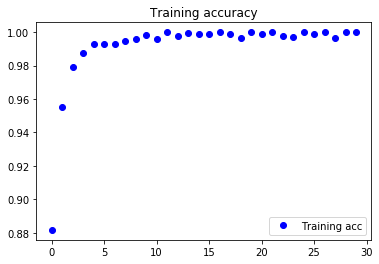

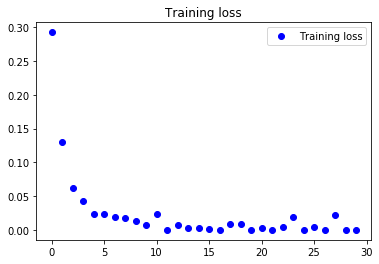

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_dir ='/content/gdrive/My Drive/art_classify/art_classify/train'

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100)

Found 325 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 36s 358ms/step - loss: 0.4274 - acc: 0.8038
Epoch 2/100
100/100 [==============================] - 35s 351ms/step - loss: 0.2190 - acc: 0.9236
Epoch 3/100
100/100 [==============================] - 36s 361ms/step - loss: 0.1750 - acc: 0.9341
Epoch 4/100
100/100 [==============================] - 35s 352ms/step - loss: 0.1497 - acc: 0.9396
Epoch 5/100
100/100 [==============================] - 35s 354ms/step - loss: 0.1194 - acc: 0.9559
Epoch 6/100
100/100 [==============================] - 35s 354ms/step - loss: 0.1317 - acc: 0.9544
Epoch 7/100
100/100 [==============================] - 36s 356ms/step - loss: 0.0987 - acc: 0.9646
Epoch 8/100
100/100 [==============================] - 36s 359ms/step - loss: 0.0847 - acc: 0.9682
Epoch 9/100
100/100 [==============================] - 36s 356ms/step - loss: 0.0685 - acc: 0.9775
Epoch 10/100
100/100 [==============================] - 36s 355ms/st

[[0.]]
Andy Warhol


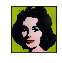

In [0]:
from keras.models import load_model

import cv2
import numpy as np

# This is module with image preprocessing utilities
from keras.preprocessing import image

# We pick one image to "augment"
img_path ='/content/gdrive/My Drive/art_classify/art_classify/Andy_Warhol_ex.jpg'
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

predictions = model.predict(x, batch_size=1)

print (predictions)

if predictions ==1. :
    label = 'Jackson Pollock'
else :
    label= 'Andy Warhol'
    
print (label)    


##########PRINT THE IMAGE ############################

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
for i in range(1):
        plt.subplot(10,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        img=mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show()
        
###################################



model.save('/content/gdrive/My Drive/artworks/AndyWarhol_JacksonPollock_model.h5')

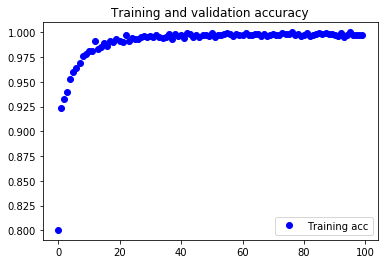

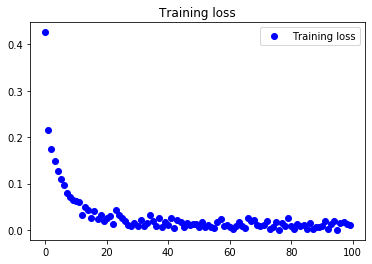

In [0]:
acc = history.history['acc']

loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'art_classify'

# The directory where we will
# store our smaller dataset
base_dir = 'art_classify'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install h5py pyyaml

In [0]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'1.15.0'

In [0]:
# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('/content/gdrive/My Drive/artworks/AndyWarhol_JacksonPollock_model.h5')
new_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

[[1.]]
Jackson Pollock


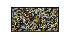

In [0]:
from keras.models import load_model

import cv2
import numpy as np

# This is module with image preprocessing utilities
from keras.preprocessing import image

# We pick one image to "augment"
img_path ='/content/gdrive/My Drive/art_classify/art_classify/Jackson_Pollock_ex.jpg'
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

predictions = new_model.predict(x, batch_size=1)

print (predictions) 

if predictions ==1. :
    label = 'Jackson Pollock'
else :
    label= 'Andy Warhol'
    
print (label)    


##########PRINT THE IMAGE ############################

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
for i in range(1):
        plt.subplot(10,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        img=mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show()
        
###################################

